In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import re
# to remove stopword
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
import matplotlib.pyplot as plt
import seaborn as sns


# DATA PRE-PROCESSING

In [2]:
os.chdir(r"C:\Users\Catherine247\CATHERINE\Internship\source")

In [3]:
with open('nlp_data.txt') as f:
    data = f.readlines()

In [4]:
data

['0.1\n',
 '§ 1.The Buddha: "What do you think, Rahula: What is a mirror for?"The Buddha:Rahula: "For reflection, sir."Rahula:The Buddha: "In the same way, Rahula, bodily acts, verbal acts, & mental acts are to be done with repeated reflection.The Buddha:"Whenever you want to perform a bodily act, you should reflect on it: \'This bodily act I want to perform — would it lead to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?\' If, on reflection, you know that it would lead to self-affliction, to the affliction of others, or to both; it would be an unskillful bodily act with painful consequences, painful results, then any bodily act of that sort is absolutely unfit for you to do. But if on reflection you know that it would not cause affliction... it would be a skillful bodily act with happy consequences, happy results, then any bodily act of that sort is fit for you to do.(Similarly with verbal acts & m

In [5]:
df=pd.DataFrame(data)

In [6]:
df1=df.copy()

In [7]:
df.head(10)

0
0                                              0.1\n
1  § 1.The Buddha: "What do you think, Rahula: Wh...
2                                              0.2\n
3  § 2.Once the Blessed One was staying at Kosamb...
4                                              0.3\n
5  § 3."'Stress should be known. The cause by whi...
6                                              0.4\n
7  § 4."Vision arose, clear knowing arose, discer...
8                                              0.5\n
9  § 5.Sariputta: "There are these three forms of...

In [8]:
#Change the column heading for easy manipulation
df.rename(columns = {0:'text'}, inplace = True)

df.head(10)

text
0                                              0.1\n
1  § 1.The Buddha: "What do you think, Rahula: Wh...
2                                              0.2\n
3  § 2.Once the Blessed One was staying at Kosamb...
4                                              0.3\n
5  § 3."'Stress should be known. The cause by whi...
6                                              0.4\n
7  § 4."Vision arose, clear knowing arose, discer...
8                                              0.5\n
9  § 5.Sariputta: "There are these three forms of...

In [9]:
#function to clean the data
def clean(text): 
    text = re.sub('§','',text)  #Remove §
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  #Remove punctuations
    text = re.sub('\d+','',text) #Remove numbers
    text = re.sub('\n', '', text) #Remove newline
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    return text

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
df['text']= df['text'].apply(lambda x:clean(x))

In [12]:
df.head(10)

text
0                                                   
1   the buddha what do you think rahula what is a...
2                                                   
3   once the blessed one was staying at kosambi i...
4                                                   
5   stress should be known the cause by which str...
6                                                   
7   vision arose clear knowing arose discernment ...
8                                                   
9   sariputta there are these three forms of stre...

In [13]:
#df=df.dropna()
df=df.replace(r'^\s*$', np.nan, regex=True)
#df['text']=df['text'].replace(' ', np.nan, inplace=True)
df.head(10)

text
0                                                NaN
1   the buddha what do you think rahula what is a...
2                                                NaN
3   once the blessed one was staying at kosambi i...
4                                                NaN
5   stress should be known the cause by which str...
6                                                NaN
7   vision arose clear knowing arose discernment ...
8                                                NaN
9   sariputta there are these three forms of stre...

In [14]:
df.shape

(1180, 1)

In [15]:
df=df.dropna()
df.index = np.arange(1, len(df) + 1)
df.head(10)

text
1    the buddha what do you think rahula what is a...
2    once the blessed one was staying at kosambi i...
3    stress should be known the cause by which str...
4    vision arose clear knowing arose discernment ...
5    sariputta there are these three forms of stre...
6    sariputta now what friends is the noble truth...
7    at savatthi there the blessed one said monks ...
8    the buddha these are the five clingingaggrega...
9    and why do you call it form rupa because it i...
10   mahakotthita feeling perception  consciousnes...

In [16]:
df.shape

(589, 1)

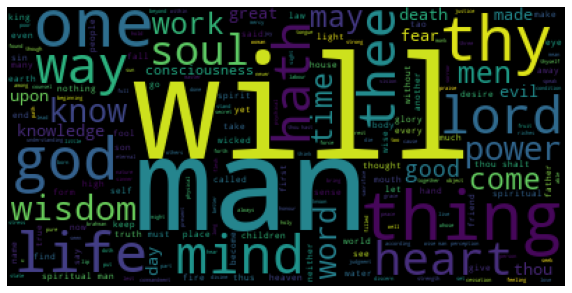

In [17]:
#WordCLoud before removing stopwords
from wordcloud import WordCloud, STOPWORDS 

t1 = df['text'].values 
wordcloud = WordCloud().generate(str(t1))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud, we can see that the words **man**, **will**, **thing**, **god**, **life**, **thy**, **one**, **lord**, **heart**, **hath**, **mind**, and **thee**, appear more number of times in the data.

In [18]:
#Tokenize the data
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [19]:
df['text'] = df['text'].apply(lambda token : tokenize(token))

In [20]:
df.head(10)

text
1   [, the, buddha, what, do, you, think, rahula, ...
2   [, once, the, blessed, one, was, staying, at, ...
3   [, stress, should, be, known, the, cause, by, ...
4   [, vision, arose, clear, knowing, arose, disce...
5   [, sariputta, there, are, these, three, forms,...
6   [, sariputta, now, what, friends, is, the, nob...
7   [, at, savatthi, there, the, blessed, one, sai...
8   [, the, buddha, these, are, the, five, clingin...
9   [, and, why, do, you, call, it, form, rupa, be...
10  [, mahakotthita, feeling, perception, consciou...

In [21]:
#Removing stop words
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [22]:
df['text'] = df['text'].apply(lambda x : remove_stopwords(x))

In [23]:
df.head(10)

text
1   [, buddha, think, rahula, mirror, forthe, budd...
2   [, blessed, one, staying, kosambi, simsapa, tr...
3   [, stress, known, cause, stress, comes, play, ...
4   [, vision, arose, clear, knowing, arose, disce...
5   [, sariputta, three, forms, stressfulness, fri...
6   [, sariputta, friends, noble, truth, stress, b...
7   [, savatthi, blessed, one, said, monks, teach,...
8   [, buddha, five, clingingaggregates, form, cli...
9   [, call, form, rupa, afflicted, ruppati, thus,...
10  [, mahakotthita, feeling, perception, consciou...

In [24]:
# lemmatizing to root word
def lemma(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [25]:
df['text'] = df['text'].apply(lambda l : lemma(l))

In [26]:
df.head(10)

text
1   [, buddha, think, rahula, mirror, forthe, budd...
2   [, blessed, one, staying, kosambi, simsapa, tr...
3   [, stress, known, cause, stress, come, play, k...
4   [, vision, arose, clear, knowing, arose, disce...
5   [, sariputta, three, form, stressfulness, frie...
6   [, sariputta, friend, noble, truth, stress, bi...
7   [, savatthi, blessed, one, said, monk, teach, ...
8   [, buddha, five, clingingaggregates, form, cli...
9   [, call, form, rupa, afflicted, ruppati, thus,...
10  [, mahakotthita, feeling, perception, consciou...

In [27]:
#joining lemma words which are tokens into a sentence
def sentence1(token1):
    return " ".join([word for word in token1])

df['text'] = df['text'].apply(lambda s1 : sentence1(s1))

In [28]:
df.head()

text
1   buddha think rahula mirror forthe buddharahul...
2   blessed one staying kosambi simsapa tree grov...
3   stress known cause stress come play known div...
4   vision arose clear knowing arose discernment ...
5   sariputta three form stressfulness friend str...

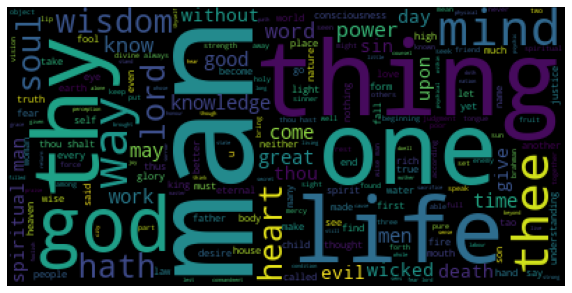

In [29]:
#WordCloud after removing stopwords and lemmatizing words
t2 = df['text'].values 
wordcloud = WordCloud().generate(str(t2))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
#Count Vectorizer for lemmatized text
count = CountVectorizer()
count.fit(df['text'])
count_transform=count.transform(df['text'])

count_transform.shape

(589, 7581)

In [31]:
C=count_transform.todense()
countlist=C.tolist()

lemma_data=pd.DataFrame(countlist,columns=count.get_feature_names())

lemma_data.head(10)

aaron  abandon  abandoned  abandoning  abase  abasement  abashed  abasing  \
0      0        0          0           0      0          0        0        0   
1      0        0          0           0      0          0        0        0   
2      0        0          0           0      0          0        0        0   
3      0        0          2           0      0          0        0        0   
4      0        0          0           0      0          0        0        0   
5      0        0          0           0      0          0        0        0   
6      0        0          0           0      0          0        0        0   
7      0        0          0           0      0          0        0        0   
8      0        0          0           0      0          0        0        0   
9      0        0          0           0      0          0        0        0   

   abated  abates  ...  yieldeth  yielding  yoga  yoke  young  yourselfthat  \
0       0       0  ...         0         0     0     0      0             1   
1       0       0  ...         0         0     0     0      0             0   
2       0       0  ...         0         0     0     0      0             0   
3       0       0  ...         0         0     0     0      0             0   
4       0       0  ...         0         0     0     0      0             0   
5       0       0  ...         0         0     0     0      0             0   
6       0       0  ...         0         0     0     0      0             0   
7       0       0  ...         0         0     0     0      0             0   
8       0       0  ...         0         0     0     0      0             0   
9       0       0  ...         0         0     0     0      0             0   

   youth  youthful  zeal  zorobabel  
0      0         0     0          0  
1      0         0     0          0  
2      0         0     0          0  
3      0         0     0          0  
4      0         0     0          0  
5      0         0     0          0  
6      0         0     0          0  
7      0         0     0          0  
8      0         0     0          0  
9      0         0     0          0  

[10 rows x 7581 columns]

In [32]:
#TFIDF Vectorizer of lemmatized data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1= TfidfVectorizer()
vect1 = tfidf1.fit_transform(df['text'])

In [33]:
vect1.shape

(589, 7581)

In [34]:
dense1=vect1.todense()
denselist1=dense1.tolist()

In [35]:
lemma_data1=pd.DataFrame(denselist1,columns=tfidf1.get_feature_names())

In [36]:
lemma_data1.head(10)

aaron  abandon  abandoned  abandoning  abase  abasement  abashed  abasing  \
0    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
1    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
2    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
3    0.0      0.0   0.092191         0.0    0.0        0.0      0.0      0.0   
4    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
5    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
6    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
7    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
8    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   
9    0.0      0.0   0.000000         0.0    0.0        0.0      0.0      0.0   

   abated  abates  ...  yieldeth  yielding  yoga  yoke  young  yourselfthat  \
0     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.027864   
1     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
2     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
3     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
4     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
5     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
6     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
7     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
8     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   
9     0.0     0.0  ...       0.0       0.0   0.0   0.0    0.0      0.000000   

   youth  youthful  zeal  zorobabel  
0    0.0       0.0   0.0        0.0  
1    0.0       0.0   0.0        0.0  
2    0.0       0.0   0.0        0.0  
3    0.0       0.0   0.0        0.0  
4    0.0       0.0   0.0        0.0  
5    0.0       0.0   0.0        0.0  
6    0.0       0.0   0.0        0.0  
7    0.0       0.0   0.0        0.0  
8    0.0       0.0   0.0        0.0  
9    0.0       0.0   0.0        0.0  

[10 rows x 7581 columns]

- CountVectorizer for lemmatized text: 589 X 7581(lemma_data)
- TFIDF Vectorizer for lemmatized data: 589 X 7581(lemma_data1)

# PCA

In [37]:
#PCA on TFIDFVectorizer Data-Lemmatized
from sklearn.decomposition import PCA

pca_test1 = PCA(0.95) 
pca1=pca_test1.fit_transform(lemma_data1)

#pca_data1=pd.DataFrame(pca1)
#pca_data1.head()

In [38]:
#PCA on CountVectorizer Data-Lemmatized
from sklearn.decomposition import PCA

pca_test2 = PCA(0.95) 
pca2=pca_test2.fit_transform(lemma_data)

#pca_data2=pd.DataFrame(pca2)
#pca_data2.head(5)

In [39]:
pca_data1=pd.DataFrame(pca1)
pca_data2=pd.DataFrame(pca2)

In [40]:
print(pca_data1.shape)
print(pca_data2.shape)

(589, 498)
(589, 281)


In [41]:
pca_data1

0         1         2         3         4         5         6    \
0   -0.110398  0.054752 -0.043933 -0.054421  0.024107  0.053018  0.047103   
1   -0.085853  0.055811 -0.059453 -0.093265 -0.082295  0.159551  0.119650   
2   -0.108166  0.056345 -0.061867 -0.130688 -0.116583  0.251529  0.136933   
3   -0.109694  0.051548 -0.048734 -0.102876 -0.097622  0.221138  0.120971   
4   -0.100558  0.050022 -0.037455 -0.050910 -0.016750  0.075109 -0.019474   
..        ...       ...       ...       ...       ...       ...       ...   
584  0.188545  0.033338  0.011702 -0.016055  0.032353 -0.209601  0.049100   
585  0.268187  0.234835  0.216804 -0.061403  0.012044 -0.084242 -0.021941   
586  0.037517  0.040327  0.001697 -0.083313  0.024127 -0.106905 -0.010112   
587  0.177725  0.184798  0.121231 -0.108376  0.004853 -0.180234 -0.006786   
588  0.121727  0.125280  0.073210 -0.162083  0.012382 -0.167947  0.001263   

          7         8         9    ...       488       489       490  \
0    0.025827 -0.038043 -0.020119  ... -0.010056  0.017822 -0.028295   
1    0.158647 -0.043341  0.127863  ...  0.009016 -0.026071  0.020058   
2    0.215776 -0.039399  0.115882  ... -0.018639 -0.004244  0.015135   
3    0.180184 -0.029051  0.126868  ... -0.002760  0.057041 -0.007519   
4    0.053531 -0.036317  0.023262  ... -0.003758 -0.008796 -0.001015   
..        ...       ...       ...  ...       ...       ...       ...   
584  0.034584 -0.008841  0.026095  ...  0.024791  0.007015  0.033781   
585  0.035451  0.039266 -0.000901  ...  0.038419 -0.047540  0.035729   
586  0.062377  0.017167 -0.008822  ...  0.001620 -0.023301 -0.010511   
587  0.024356  0.041710  0.033853  ... -0.040219  0.068815 -0.008588   
588  0.040503  0.099772 -0.019503  ... -0.051348 -0.025705  0.010926   

          491       492       493       494       495       496       497  
0   -0.020830  0.020563 -0.014400 -0.011912 -0.010182  0.007381 -0.029849  
1   -0.009884  0.022217  0.032281  0.032349  0.020640 -0.004831 -0.071028  
2    0.033325  0.059033  0.013505  0.001657  0.027700 -0.029812  0.055530  
3   -0.025501 -0.017657 -0.060314 -0.067293 -0.006389  0.050778 -0.023844  
4   -0.008486 -0.005237  0.011666  0.002306  0.002469  0.002791 -0.006593  
..        ...       ...       ...       ...       ...       ...       ...  
584 -0.027977  0.004752 -0.028078 -0.018240 -0.007373  0.003017 -0.022116  
585 -0.037917 -0.059261  0.036545  0.032647 -0.051243  0.005431 -0.001304  
586 -0.024988 -0.021264 -0.012058 -0.031352  0.029417 -0.028431 -0.000903  
587  0.000234  0.014382 -0.033576  0.026039 -0.036278  0.011661  0.008369  
588  0.043449  0.039699 -0.044591 -0.016056  0.013525 -0.010783  0.026560  

[589 rows x 498 columns]

In [42]:
pca_data2

0         1          2         3         4         5          6    \
0    -3.683922  3.601338   0.823591  2.186312  1.924692 -1.489385 -11.838990   
1    -2.779444  0.667505   0.114919  1.409990  1.700425 -0.756868  -2.875587   
2    -3.228983  3.390888   0.250288  3.194299  9.665108  2.496120  -9.940013   
3    -3.647701  0.773937  -0.100818  1.447414  5.368471  0.727178  -5.878936   
4    -3.792528 -0.856216   0.098588 -1.131138  0.286939 -0.917530   0.216386   
..         ...       ...        ...       ...       ...       ...        ...   
584   5.499337 -0.637571   1.877261  5.211046 -3.761051  0.538434   0.030133   
585  13.718893 -0.150197  14.443905  2.967704  0.412687 -0.177455   1.181953   
586   0.409241 -0.200022   1.601251  3.317670 -0.423260 -2.021267   0.139837   
587   6.292098  0.582244   8.621890  5.388945 -1.138486 -0.739130  -0.370160   
588   3.476488  0.155981   5.220799  5.583481 -1.582827 -1.983398  -0.243914   

           7          8         9    ...       271       272       273  \
0    51.665512   3.337015  0.875012  ...  0.035024 -0.019794  0.008772   
1    -0.576630  -2.940110  0.570419  ... -0.074969  0.090704 -0.196818   
2    -1.248332 -13.096841  5.841799  ... -0.155041 -0.109710  0.095940   
3    -1.912851  -4.064640  1.214078  ...  0.236262  0.058967  0.165018   
4    -0.191638  -0.131499 -0.514748  ... -0.154779  0.073932  0.249009   
..         ...        ...       ...  ...       ...       ...       ...   
584   0.371742  -0.889911 -1.311577  ...  0.122910  0.157729 -0.291514   
585  -0.067800   3.133600  0.471495  ...  0.036586 -0.062434  0.026896   
586  -0.558892   1.158255  0.296091  ... -0.256064 -0.050303  0.021418   
587  -0.242316  -0.716900 -0.329351  ...  0.036796 -0.070191 -0.000151   
588  -0.529675   2.360439 -0.708923  ...  0.396830 -0.392935  0.021052   

          274       275       276       277       278       279       280  
0    0.020701 -0.026237  0.007581 -0.018477  0.013901 -0.055172  0.026380  
1   -0.022451  0.273932 -0.070864  0.085129  0.133127  0.155047 -0.100199  
2   -0.053209 -0.087836  0.158066  0.138583 -0.026551  0.001331  0.012422  
3    0.082284 -0.055035 -0.246309 -0.068705 -0.202308 -0.014151  0.029602  
4    0.020480 -0.197210  0.159164  0.145609 -0.071496  0.187390  0.141933  
..        ...       ...       ...       ...       ...       ...       ...  
584 -0.193055 -0.137253 -0.012186  0.202659 -0.140348 -0.087783 -0.123860  
585 -0.074220  0.013560 -0.106698 -0.053012  0.026909  0.080867 -0.149999  
586 -0.243574 -0.052200  0.270730 -0.181818  0.392661  0.202834 -0.152829  
587 -0.137261 -0.040330  0.080064 -0.296509  0.015369  0.149258  0.031111  
588 -0.077976 -0.041438 -0.011100  0.102947 -0.094174 -0.096066  0.031193  

[589 rows x 281 columns]

**PCA**

* PCA on TFIDFVectorizer Data-Lemmatized: 589 rows × 498 columns(pca_data1 or pca1)
* PCA on CountVectorizer Data-Lemmatized:589 rows × 281 columns(pca_data2 or pca2)

# DETERMINING NUMBER OF K's

**ELBOW PLOT**

In [43]:
#TFIDFVectorizer Data-Lemmatized
from sklearn.cluster import KMeans

dist=[]
for i in range(2,11):
	k=KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=42)
	k.fit(pca1)
	dist.append(k.inertia_)

[522.0021568420441, 517.1566244453337, 514.3086668941779, 510.9857532284473, 508.08318688646375, 505.61481425876826, 503.00729709224873, 500.24364227626336, 499.391158843792]


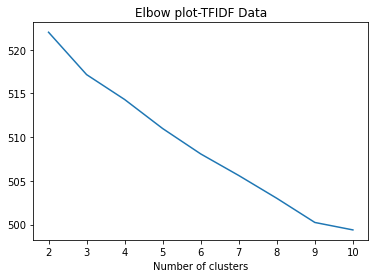

In [44]:
print(dist)

import matplotlib.pyplot as plt

plt.plot(range(2,11),dist)
plt.title('Elbow plot-TFIDF Data')
plt.xlabel('Number of clusters')
plt.show()
#The elbow plot does not show the proper number of clusters.

In [45]:
#CountVectorizer Data-Lemmatized
from sklearn.cluster import KMeans

dist=[]
for i in range(2,11):
	k=KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=42)
	k.fit(pca2)
	dist.append(k.inertia_)

[134519.9274627747, 118177.2622852474, 112530.95429644789, 109055.56173408359, 106457.60215695186, 102653.96657902839, 100598.70602411513, 100243.39465245737, 96842.80513383435]


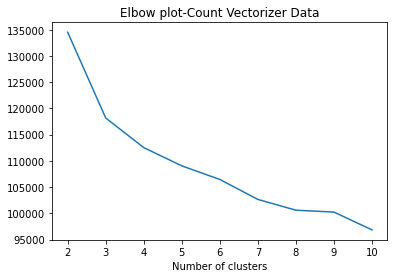

In [46]:
print(dist)

import matplotlib.pyplot as plt

plt.plot(range(2,11),dist)
plt.title('Elbow plot-Count Vectorizer Data')
plt.xlabel('Number of clusters')
plt.show()
#The elbow plot does not show the proper number of clusters.

**SILHOUETTE ANALYSIS**

In [47]:
from sklearn.metrics import silhouette_samples,silhouette_score

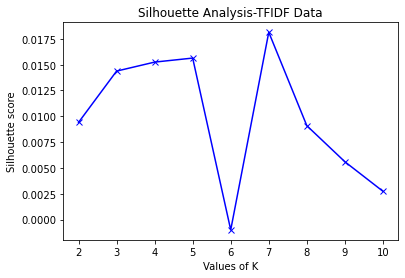

In [48]:
#Silhoutte analysis of TFIDF vectorized data: Lemmatized
clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
num = []
for num_clusters in clusters:
# initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters,random_state=42)
 kmeans.fit(pca1)
 cluster_labels = kmeans.labels_
 # silhouette score
 num.append(silhouette_score(pca1, cluster_labels))
    
plt.plot(clusters,num,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis-TFIDF Data')
plt.show()

The silhouette analysis shows 7 number of clusters which are not optimal.

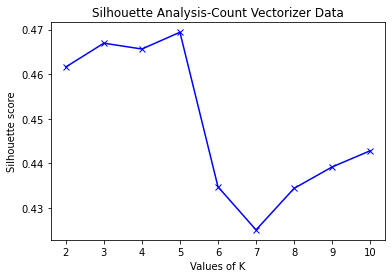

In [49]:
#Silhoutte analysis of Count vectorized data: Lemmatized
clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
num = []
for num_clusters in clusters:
# initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters,random_state=42)
 kmeans.fit(pca2)
 cluster_labels = kmeans.labels_
 # silhouette score
 num.append(silhouette_score(pca2, cluster_labels))
    
plt.plot(clusters,num,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis-Count Vectorizer Data')
plt.show()

The silhouette analysis shows 5 number of clusters which are not optimal.

**DEPTH DIFFERENCE**

**MAHALANOBIS DISTANCE**


In [50]:
from sklearn.neighbors import DistanceMetric

def mahalanobis(data=None,cov=None):
    X=data[data.columns].values
    covariance=np.linalg.inv(np.cov(X.T))
    dist=DistanceMetric.get_metric('mahalanobis',VI=covariance)
    d=dist.pairwise(X)
    m=1/(1+d)
    depth=np.median(m,axis=1)
    return(depth)

In [51]:
text=mahalanobis(data=pca_data1[pca_data1.columns])

In [52]:
#DeD Method 
ded_data=pd.DataFrame(text) #Data with depth values
DM=ded_data.max() #Depth Median
avgdiff=abs((ded_data-DM)).mean() #Average difference between depths within points and median
n=pca_data1.shape[0]

In [53]:
Diff=0
depthDiff=[]
for k in range(2,10):
    r = n//k
    start = 0
    end = 0
    diff=0
    for j in range(2, k-2):
        print(j)
        start = end + 1
        end = start + r - 1
        Di = ded_data.iloc[start:end]
        DM = Di[0].max()
        avg = np.mean((abs((Di-DM))))
        diff = diff+avg
        #print(avdiff)
        
    #print(diffd)
    DW = diff/k
    #print(DW)
    DB = avgdiff-DW
    #print(DB)
    Ded = (DW - DB)
    #print(Ded)
    depthDiff.append(Ded)
    #print(diff)
    
print(depthDiff)

2
2
3
2
3
4
2
3
4
5
2
3
4
5
6
[0   -0.007194
dtype: float64, 0   -0.007194
dtype: float64, 0   -0.007194
dtype: float64, 0   -0.00544
dtype: float64, 0   -0.004416
dtype: float64, 0   -0.00381
dtype: float64, 0   -0.00331
dtype: float64, 0   -0.00368
dtype: float64]


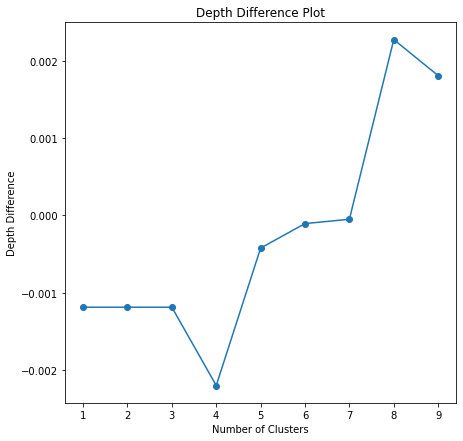

In [201]:
plt.figure(figsize=(7,7))
plt.plot(range(1,10),depthDiff,marker='o')
plt.title('Depth Difference Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Depth Difference')
plt.show()

# K-MEANS CLUSTERING

* PCA on CountVectorizer Data-Lemmatized:589 rows × 281 columns(pca3)

* PCA on TFIDFVectorizer Data-Lemmatized: 589 rows × 498 columns(pca1)

In [56]:
#TFIDFVectorizer Data-Lemmatized
from sklearn.cluster import KMeans
model =KMeans(n_clusters=8,init='k-means++',n_init=100,random_state=42)
model.fit(pca1)

KMeans(n_init=100, random_state=42)

In [57]:
lem1=model.predict(pca1)

In [58]:
lem1

array([1, 3, 3, 3, 0, 3, 5, 3, 5, 5, 0, 3, 3, 3, 5, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 0, 5, 0, 0, 3, 0, 0, 3, 0, 0, 1, 5, 5, 5, 5, 5, 5, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 5, 5, 7,
       7, 7, 7, 5, 7, 7, 5, 7, 0, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 5, 1, 5, 0, 5, 1, 7, 0,
       7, 5, 5, 7, 0, 0, 7, 5, 1, 0, 1, 1, 5, 1, 5, 1, 7, 7, 5, 7, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 7, 1, 5, 5, 1, 1, 0, 5,
       7, 7, 5, 7, 0, 5, 0, 5, 5, 5, 1, 7, 1, 5, 5, 7, 7, 7, 7, 1, 1, 7,
       7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 1, 5, 5, 5, 5, 5, 7, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6,

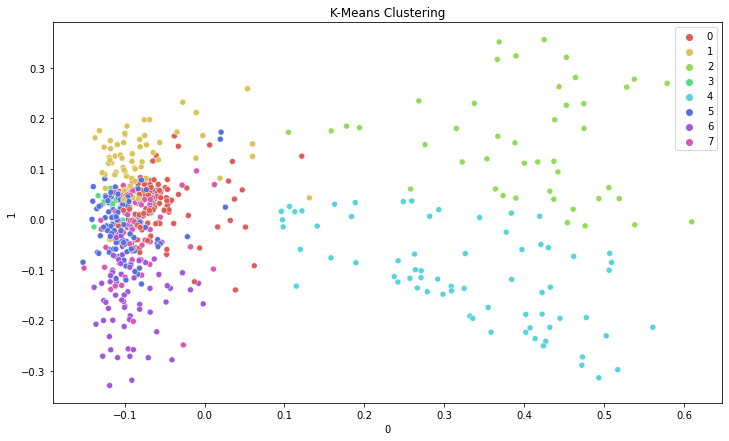

In [59]:
#Plot of clusters
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('K-Means Clustering')
    plt.show()
    
show_clusters(pca_data1, model.labels_)

In [60]:
from collections import Counter
kmeans=Counter(model.labels_)

count_data = pd.DataFrame.from_dict(kmeans, orient='index').reset_index()
count_data=count_data.rename(columns={'index':'Cluster', 0:'Count'})
count_data=count_data.sort_values(by=['Cluster'])
count_data

Cluster  Count
2        0    146
0        1     66
7        2     44
1        3     19
6        4     68
3        5    120
5        6     66
4        7     60

In [61]:
labels=model.labels_
title=df['text']

In [62]:
t=pd.DataFrame(list(zip(title,labels)),columns=['text','cluster'])

Cluster: 0


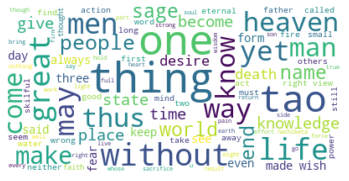

Cluster: 1


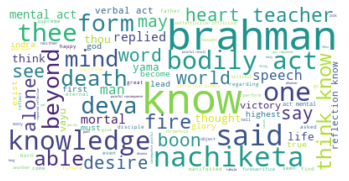

Cluster: 2


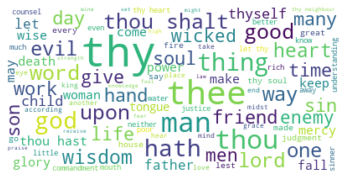

Cluster: 3


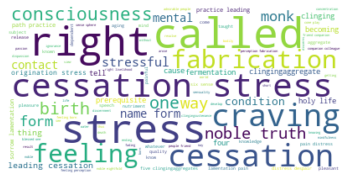

Cluster: 4


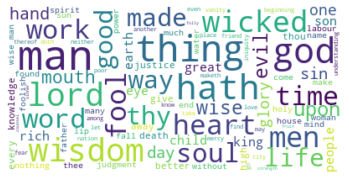

Cluster: 5


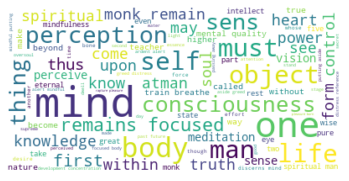

Cluster: 6


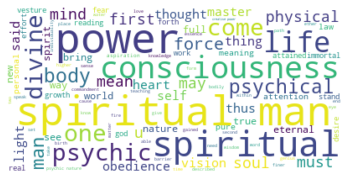

Cluster: 7


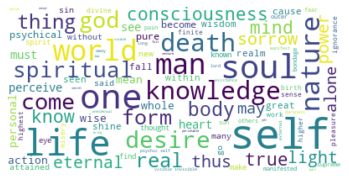

In [63]:
from wordcloud import WordCloud
result={'cluster':labels,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

In [64]:
#CountVectorizer Data-Lemmatized
from sklearn.cluster import KMeans
model1 =KMeans(n_clusters=8,init='k-means++',n_init=100,random_state=42)
model1.fit(pca2)

KMeans(n_init=100, random_state=42)

In [65]:
lem2=model1.predict(pca2)

In [66]:
lem2

array([7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 4, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

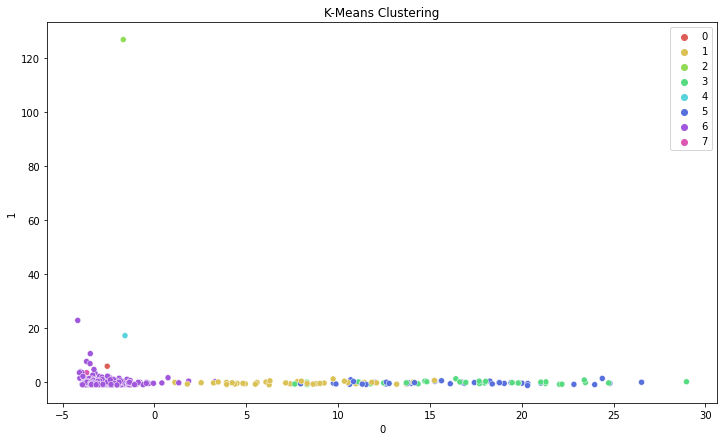

In [67]:
#Plot of clusters
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('K-Means Clustering')
    plt.show()
    
show_clusters(pca_data2, model1.labels_)

In [68]:
from collections import Counter
kmeans1=Counter(model1.labels_)

count_data1 = pd.DataFrame.from_dict(kmeans1, orient='index').reset_index()
count_data1=count_data1.rename(columns={'index':'Cluster', 0:'Count'})
count_data1=count_data1.sort_values(by=['Cluster'])
count_data1

Cluster  Count
2        0      1
7        1     39
3        2      1
6        3     31
4        4      1
5        5     39
1        6    476
0        7      1

Cluster: 0


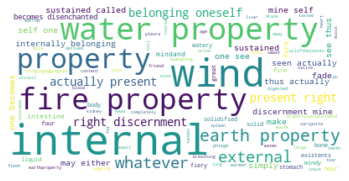

Cluster: 1


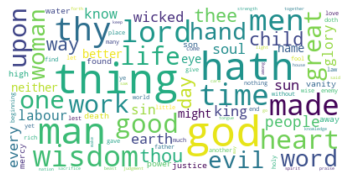

Cluster: 2


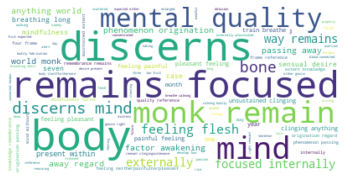

Cluster: 3


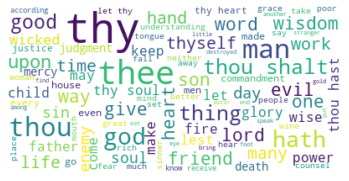

Cluster: 4


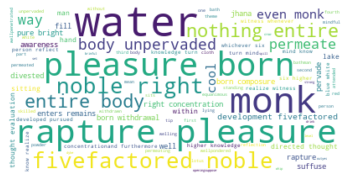

Cluster: 5


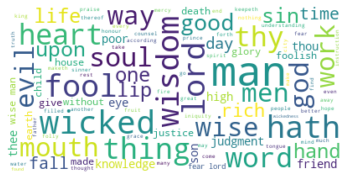

Cluster: 6


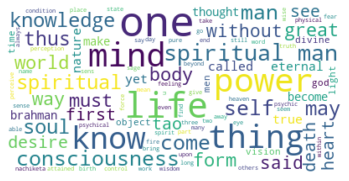

Cluster: 7


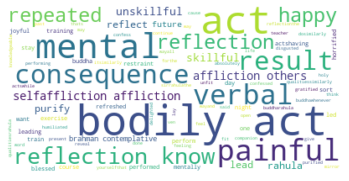

In [69]:
t=pd.DataFrame(list(zip(title,model1.labels_)),columns=['text','cluster'])

from wordcloud import WordCloud
result={'cluster':model1.labels_,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# SPECTRAL CLUSTERING

In [70]:
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [71]:
spectral1 = SpectralClustering(n_clusters = 8, affinity ='rbf',random_state=42)
#TFIDF Lemmatized
spec1 = spectral1.fit(pca1)
y_pred = spec1.labels_

In [72]:
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 5, 4, 5, 5, 5, 2, 4, 4, 2, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 1, 4, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 1, 2, 4, 4, 2, 2, 2, 4, 4, 4,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 1, 4, 1, 2, 2, 2, 2, 2, 4, 1, 4, 1,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 1, 4, 4, 2, 4, 2, 2, 5, 5, 5, 5, 2,
       5, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4,
       1, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0,

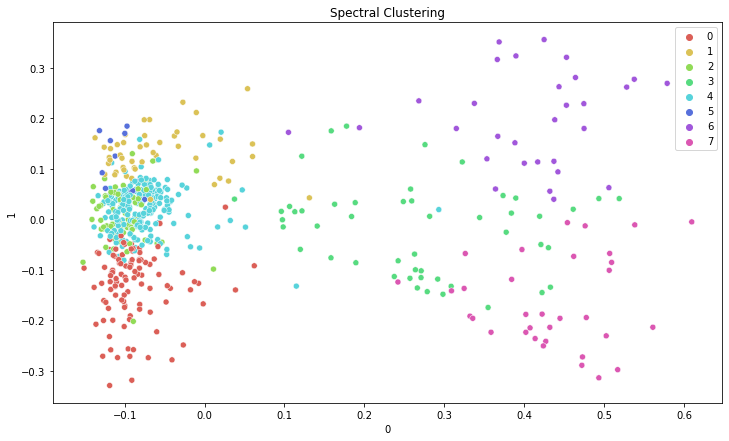

In [73]:
#Plot of clusters
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('Spectral Clustering')
    plt.show()
    
show_clusters(pca_data1, spectral1.labels_)

In [74]:
spec_lab=Counter(y_pred)

spec_data = pd.DataFrame.from_dict(spec_lab, orient='index').reset_index()
spec_data=spec_data.rename(columns={'index':'Cluster', 0:'Count'})
spec_data=spec_data.sort_values(by=['Cluster'])
spec_data

Cluster  Count
4        0    103
3        1     48
1        2     70
7        3     49
0        4    245
2        5     11
5        6     30
6        7     33

Cluster: 0


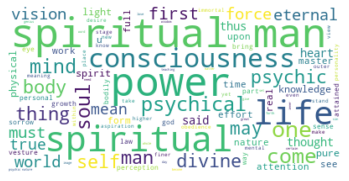

Cluster: 1


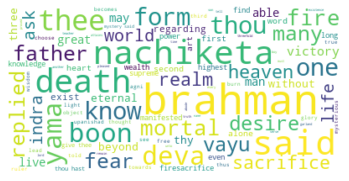

Cluster: 2


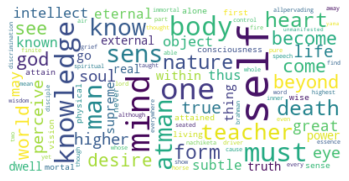

Cluster: 3


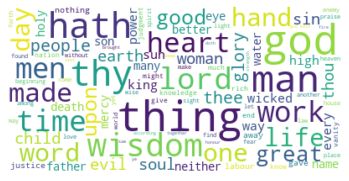

Cluster: 4


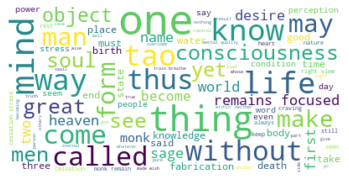

Cluster: 5


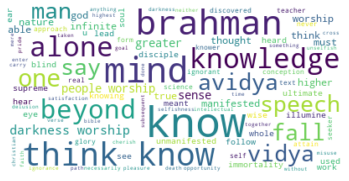

Cluster: 6


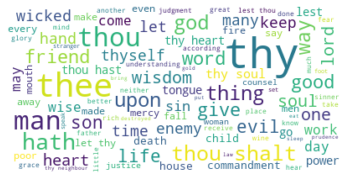

Cluster: 7


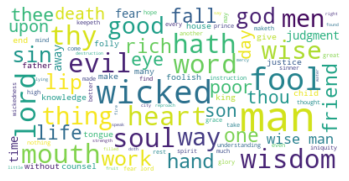

In [75]:
t=pd.DataFrame(list(zip(title,spectral1.labels_)),columns=['text','cluster'])

from wordcloud import WordCloud
result={'cluster':y_pred,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [76]:
spectral2 = SpectralClustering(n_clusters = 8, affinity ='rbf',random_state=42)
#CountVector Lemmatized
spec2 = spectral2.fit(pca2)
y_pred1 = spec2.labels_

C:\Users\Catherine247\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [77]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

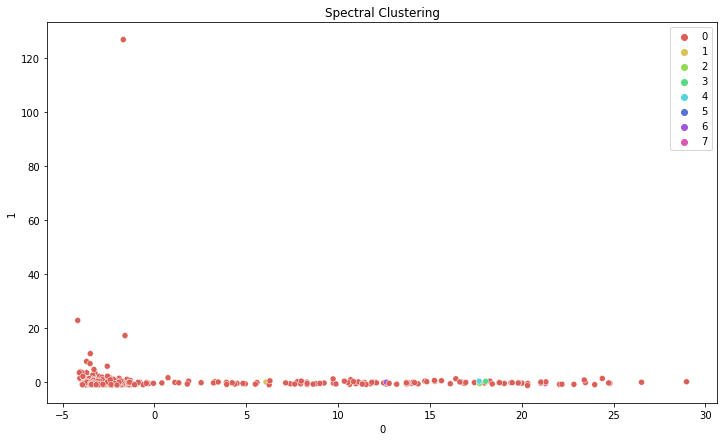

In [78]:
#Plot of clusters
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('Spectral Clustering')
    plt.show()
    
show_clusters(pca_data2, spectral2.labels_)

In [79]:
spec_lab1=Counter(y_pred1)

spec_data1 = pd.DataFrame.from_dict(spec_lab1, orient='index').reset_index()
spec_data1=spec_data1.rename(columns={'index':'Cluster', 0:'Count'})
spec_data1=spec_data1.sort_values(by=['Cluster'])
spec_data1

Cluster  Count
0        0    582
3        1      1
5        2      1
7        3      1
6        4      1
1        5      1
4        6      1
2        7      1

Cluster: 0


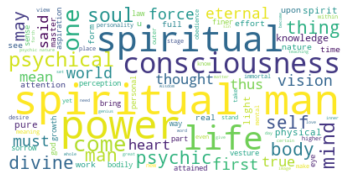

Cluster: 1


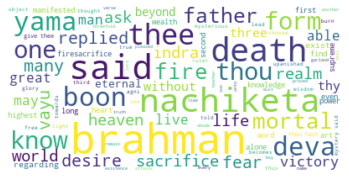

Cluster: 2


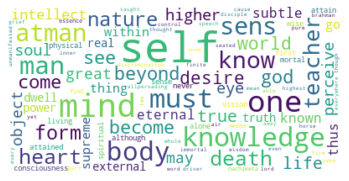

Cluster: 3


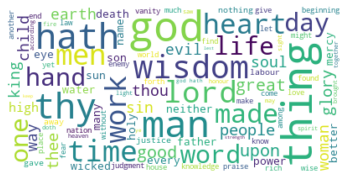

Cluster: 4


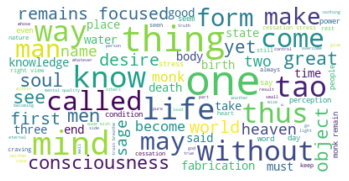

Cluster: 5


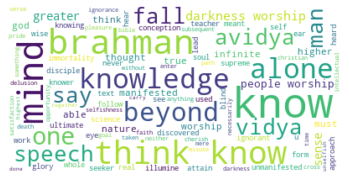

Cluster: 6


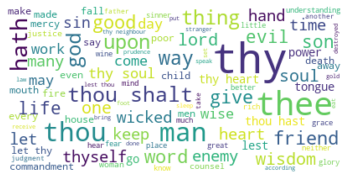

Cluster: 7


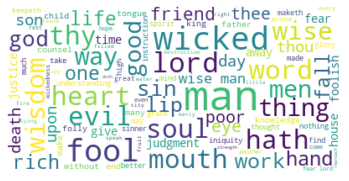

In [80]:
t=pd.DataFrame(list(zip(title,spectral2.labels_)),columns=['text','cluster'])

from wordcloud import WordCloud
result={'cluster':y_pred,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Hierarchical Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering 

In [82]:
#TFIDF-Lemmatized
hier1= AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
h_pred= hier1.fit_predict(pca1) 

In [83]:
h_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 3, 3, 2,
       2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,

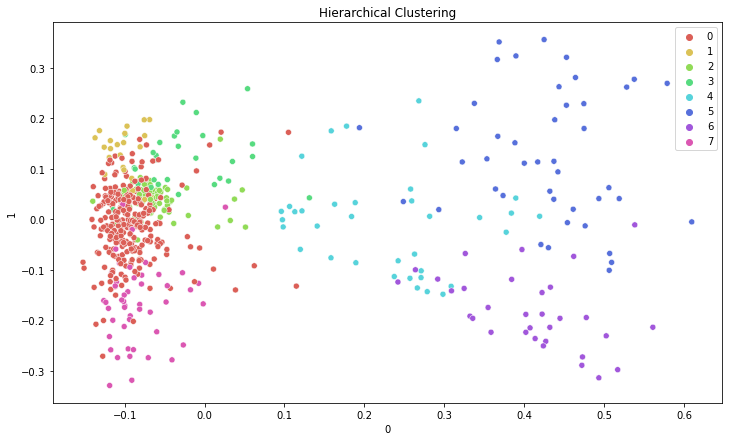

In [84]:
#Plot of clusters
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('Hierarchical Clustering')
    plt.show()
    
show_clusters(pca_data1, hier1.labels_)

In [85]:
hier_data=Counter(h_pred)

hier_data1 = pd.DataFrame.from_dict(hier_data, orient='index').reset_index()
hier_data1=hier_data1.rename(columns={'index':'Cluster', 0:'Count'})
hier_data1=hier_data1.sort_values(by=['Cluster'])
hier_data1

Cluster  Count
1        0    286
2        1     24
0        2     91
3        3     29
6        4     36
5        5     43
7        6     32
4        7     48

Cluster: 0


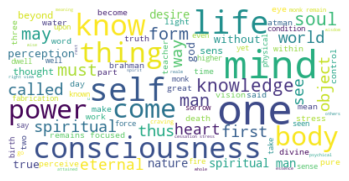

Cluster: 1


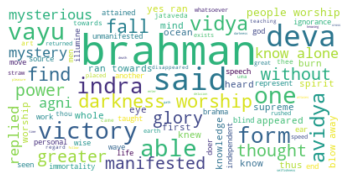

Cluster: 2


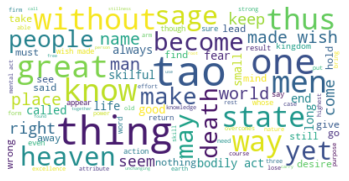

Cluster: 3


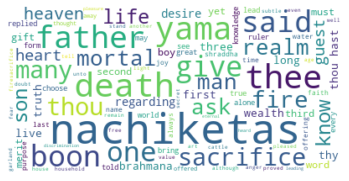

Cluster: 4


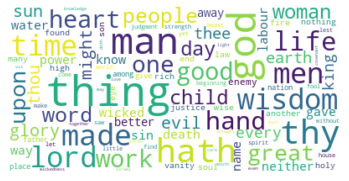

Cluster: 5


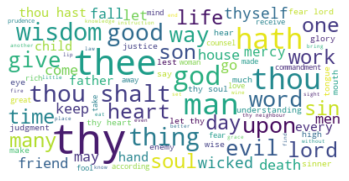

Cluster: 6


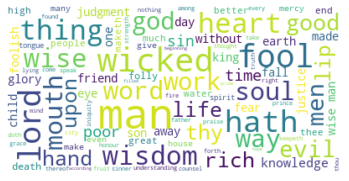

Cluster: 7


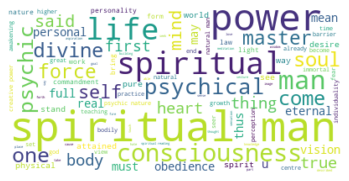

In [86]:
t=pd.DataFrame(list(zip(title,hier1.labels_)),columns=['text','cluster'])

from wordcloud import WordCloud
result={'cluster':h_pred,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [87]:
#CountVector-Lemmatized
hier2= AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
h_pred2= hier2.fit_predict(pca2) 

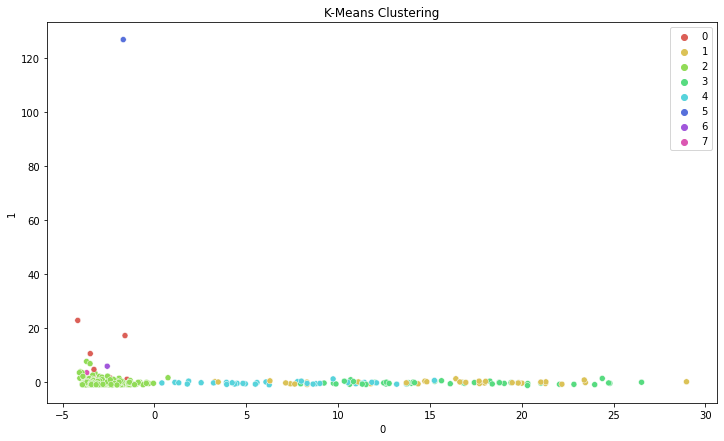

In [88]:
def show_clusters(data, labels):
    plt.figure(figsize=(12,7))
    palette = sns.color_palette('hls', n_colors=len(set(labels)))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
    #plt.axis('off')
    plt.title('K-Means Clustering')
    plt.show()
    
show_clusters(pca_data2, hier2.labels_)

In [89]:
hier_lab=Counter(h_pred2)

hier_data2 = pd.DataFrame.from_dict(hier_lab, orient='index').reset_index()
hier_data2=hier_data2.rename(columns={'index':'Cluster', 0:'Count'})
hier_data2=hier_data2.sort_values(by=['Cluster'])
hier_data2

Cluster  Count
3        0      7
7        1     35
1        2    466
6        3     43
5        4     35
4        5      1
2        6      1
0        7      1

Cluster: 0


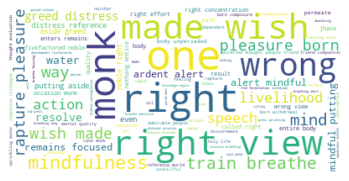

Cluster: 1


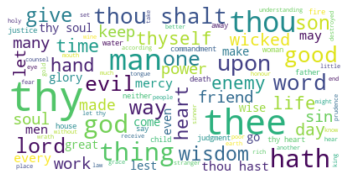

Cluster: 2


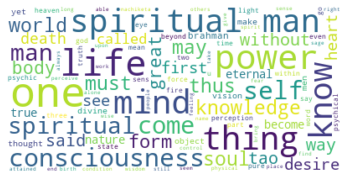

Cluster: 3


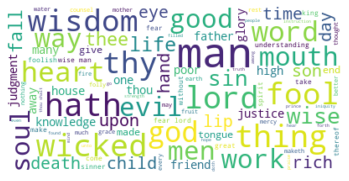

Cluster: 4


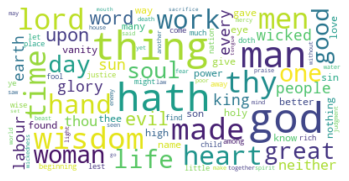

Cluster: 5


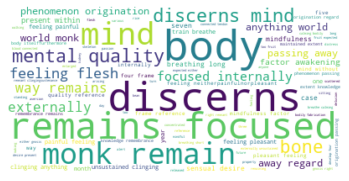

Cluster: 6


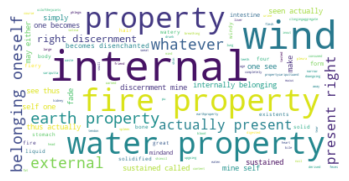

Cluster: 7


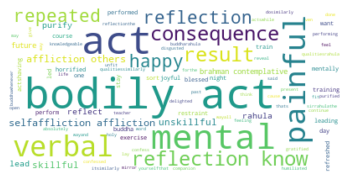

In [90]:
t=pd.DataFrame(list(zip(title,hier2.labels_)),columns=['text','cluster'])

from wordcloud import WordCloud
result={'cluster':h_pred2,'text':df['text']}
result=pd.DataFrame(result)
for k in range(0,8):
    s=result[result.cluster==k]
    text=s['text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    #print('Titles')
    titles=t[t.cluster==k]['text']         
    #print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# MODEL EVALUATION

Kmeans
TFIDF:model.labels_
Count:lem2 or model1.labels_

SPECTRAL
TFIDF:y_pred or spec1.labels_
Count:y_pred1 or spec2.labels_

HIERARCHICAL
TFIDF:h_pred or hier1.labels_
Count:h_pred2 or hier2.labels_

In [91]:
from sklearn import metrics
labels = model.labels_
print("Kmeans-TFIDF:",metrics.silhouette_score(pca1, labels, metric='euclidean')*100)

labels = model1.labels_
print("Kmeans-Count:",metrics.silhouette_score(pca2, labels, metric='euclidean')/100)
print('----------------------------------------------------')
labels = spec1.labels_
print("Spectral-TFIDF:",abs(metrics.silhouette_score(pca1, labels, metric='euclidean'))*100)

labels = spec2.labels_
print("Spectral-Count:",metrics.silhouette_score(pca2, labels, metric='euclidean')/100)
print('----------------------------------------------------')
labels = hier1.labels_
print("Hierarchical-TFIDF:",abs(metrics.silhouette_score(pca1, labels, metric='euclidean'))*100)

labels = hier2.labels_
print("Hierarchical-Count:",metrics.silhouette_score(pca2, labels, metric='euclidean')/100)

Kmeans-TFIDF: 0.24886309048719243
Kmeans-Count: 0.0042150783037222
----------------------------------------------------
Spectral-TFIDF: 0.2100522793704308
Spectral-Count: 0.0037810392301895128
----------------------------------------------------
Hierarchical-TFIDF: 0.1776011743089859
Hierarchical-Count: 0.004159246292707601


# MODEL SELECTION

* The silhouette score for K-Means clustering with tfidf vectorized data is the maximum and so we select that model

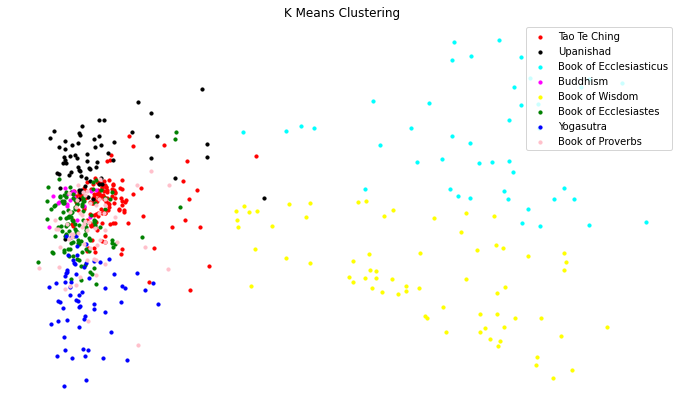

In [105]:
plt.figure(figsize=(12,7))
plt.scatter(pca1[lem1 == 0, 0], pca1[lem1 == 0, 1], s = 10, c = 'red', label = 'Tao Te Ching')  
plt.scatter(pca1[lem1 == 1, 0], pca1[lem1 == 1, 1], s = 10, c = 'black', label = 'Upanishad')  
plt.scatter(pca1[lem1== 2, 0], pca1[lem1 == 2, 1], s = 10, c = 'cyan', label = 'Book of Ecclesiasticus')  
plt.scatter(pca1[lem1 == 3, 0], pca1[lem1 == 3, 1], s = 10, c = 'magenta', label = 'Buddhism')  
plt.scatter(pca1[lem1 == 4, 0], pca1[lem1 == 4, 1], s = 10, c = 'yellow', label = 'Book of Wisdom')  
plt.scatter(pca1[lem1 == 5, 0], pca1[lem1 == 5, 1], s = 10, c = 'green', label = 'Book of Ecclesiastes') 
plt.scatter(pca1[lem1 == 6, 0], pca1[lem1 == 6, 1], s = 10, c = 'blue', label = 'Yogasutra') 
plt.scatter(pca1[lem1 == 7, 0], pca1[lem1 == 7, 1], s = 10, c = 'pink', label = 'Book of Proverbs') 

plt.axis('off')
plt.title('K Means Clustering')   
plt.legend()  
plt.show()

From the word clouds, the following conclusions can be made about each cluster.<br/>
**Cluster 0**:	Tao Te Ching<br/>
**Cluster 1**:	Upanishad<br/>
**Cluster 2**:	Book of Ecclestiasticus<br/>
**Cluster 3**:	Buddhism<br/>
**Cluster 4**:	Book of Wisdom<br/>
**Cluster 5**:	Book of Ecclesiastes<br/>
**Cluster 6**:	Yoga sutra<br/>
**Cluster 7**:	Book of Proverbs<br/>

